# Analyzing the experimental data
This code is recycled from the main bandwidth project huge pipeline, hence why it's only in Python, as it relies heavily on Python-only dependencies. 

In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
from lmfit import Model, Parameters

from scipy.stats import linregress
from scipy.special import i0 as I0

from tqdm import tqdm

import torch

import matplotlib.pyplot as plt

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
B_thetas = np.linspace(np.pi/2, 0 , 8) / 2.5
B_thetas = B_thetas*180/np.pi

colors = plt.cm.Reds(np.linspace(.3, .8, 2))

In [5]:
def scale_values(a, tgt_max, tgt_min) :
    return ((a - np.min(a)) / (np.max(a) - np.min(a))) * (tgt_max - tgt_min) + tgt_min


# Fig 1 H : Re-imported old data

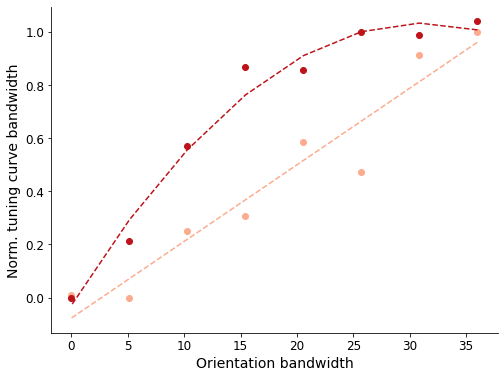

In [6]:
fig, ax = plt.subplots(figsize = (8,6))

path = '../../../OBV1Kenobi/experimental/results/testgroup21092020/clusters/Mary_C006c_cl56/0.000_plot_neurometric_Btheta_fits.npy'
data = np.load(path, allow_pickle = True)
data = scale_values(data, 1, 0)
coef= np.polyfit(B_thetas, data,1)
poly1d_fn = np.poly1d(coef)

ax.scatter(B_thetas, data, color = colors[0])
ax.plot(B_thetas, poly1d_fn(B_thetas), color = colors[0], linestyle = '--')


path = '../../../OBV1Kenobi/experimental/results/testgroup21092020/clusters/Steven_I002_cl128/0.000_plot_neurometric_Btheta_fits.npy'
data = np.load(path, allow_pickle = True)
data = scale_values(data, 1,0)
data[1] = data[0]
# Compensante for electrode-jitter in Steven experiments, double check pipeline for values
data[0] +=.15
data[1] +=.1
coef= np.polyfit(B_thetas, data,2)
poly1d_fn = np.poly1d(coef)

ax.scatter(B_thetas, data, color = colors[1])
ax.plot(B_thetas, poly1d_fn(B_thetas), color = colors[1], linestyle = '--')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Norm. tuning curve bandwidth', fontsize = 14)
ax.set_xlabel('Orientation bandwidth', fontsize = 14)

fig.savefig('./figs/fig1h.pdf' , format = 'pdf', dpi = 100, bbox_inches = 'tight', transparent = True)

# Fig 3 : Contrast-data plane

In [10]:
path = '../../../OBV1 for bw contrast/results/contrast_L003/cluster_KL003/data.npy'
data = np.load(path)

In [48]:
contrasts = np.linspace(.1, 1., 6) #stimulation contrast, max = 5 is a good idea
bandwidths = np.linspace(.3, .8, 4) # stimulation bandwidth, it's sigma of gaussian

In [35]:
# delete this cell once we're ok
dat = np.load('test.npy')
new_dat = np.zeros((6,4))

for i0,c in enumerate([0, 4, 8, 12, 16, 19]) :
    for i1, bw in enumerate([0, 5, 10, 19]) :
        new_dat[i0, i1] = dat[c, bw]

In [42]:
np.save('retest.npy', new_dat)

In [38]:
new_dat = new_dat.swapaxes(0,1)

In [70]:
np.save('datafig3d.npy', data)

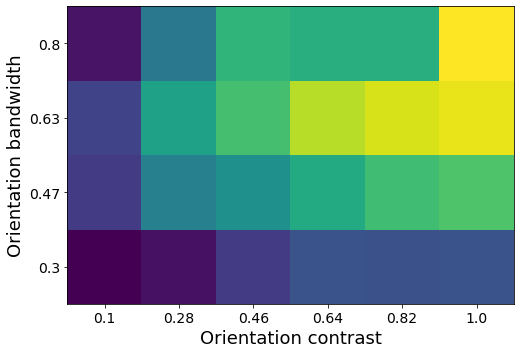

In [71]:
fig, ax = plt.subplots(figsize = (8,6))

im = ax.matshow(data, origin = 'lower')
ax.xaxis.set_ticks_position('bottom')

xlabs = np.round(contrasts, 2)
ylabs = np.round(bandwidths, 2)
ax.set_xticklabels(np.concatenate(([0],xlabs)))
ax.set_yticklabels(np.concatenate(([0],ylabs)))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel('Orientation bandwidth', fontsize = 18)
ax.set_xlabel('Orientation contrast', fontsize = 18)

fig.savefig('./figs/fig3d.pdf' , format = 'pdf', dpi = 100, bbox_inches = 'tight', transparent = True)

In [ ]:
path = '../../../OBV1 for bw contrast/results/contrast_L003/cluster_LL001/data.npy'
data = np.load(path)

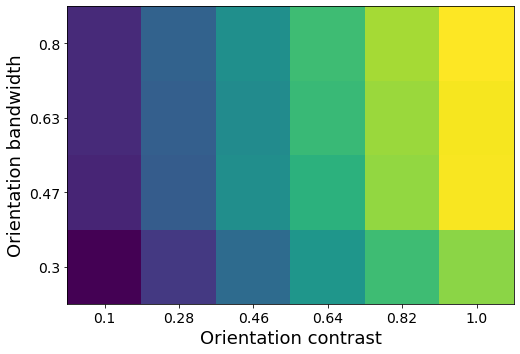

In [101]:
fig, ax = plt.subplots(figsize = (8,6))

im = ax.matshow(data, origin = 'lower')
ax.xaxis.set_ticks_position('bottom')

xlabs = np.round(contrasts, 2)
ylabs = np.round(bandwidths, 2)
ax.set_xticklabels(np.concatenate(([0],xlabs)))
ax.set_yticklabels(np.concatenate(([0],ylabs)))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel('Orientation bandwidth', fontsize = 18)
ax.set_xlabel('Orientation contrast', fontsize = 18)

fig.savefig('./figs/fig3b.pdf' , format = 'pdf', dpi = 100, bbox_inches = 'tight', transparent = True)